## Predict airplane journey's satisfaction

In this project, We have classification problem, where we will attemp to create a model that predicts whether a customer was **Satisfied** or **Unsatisfied** with the experience of the flight, and check for some interesting insights.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

### upload and check the data

In [2]:
df=pd.read_csv("C:/Users/97254/.conda/train.csv")
df

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [3]:
#The number of rows and columns
df.shape

(103904, 25)

**Remove the unnecessary features**

In [4]:
df = df.drop(["Unnamed: 0","id"], axis=1)

##   We have 23 features:

1. Gender: Gender of the passengers (Female, Male)
 

2. Customer Type: The customer type (Loyal customer, disloyal customer)

    
3. Age: The actual age of the passengers

    
4. Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)

    
5. Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)
 

6. Flight distance: The flight distance of this journey
 

7. Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)

    
8. Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient
 

9. Ease of Online booking: Satisfaction level of online booking
 

10. Gate location: Satisfaction level of Gate location
 

11. Food and drink: Satisfaction level of Food and drink
 

12. Online boarding: Satisfaction level of online boarding
 

13. Seat comfort: Satisfaction level of Seat comfort

    
14. Inflight entertainment: Satisfaction level of inflight entertainment
 

15. On-board service: Satisfaction level of On-board service
 

16. Leg room service: Satisfaction level of Leg room service

    
17. Baggage handling: Satisfaction level of baggage handling
 

18. Check-in service: Satisfaction level of Check-in service
 

19. Inflight service: Satisfaction level of inflight service
 

20. Cleanliness: Satisfaction level of Cleanliness
 

21. Departure Delay in Minutes: Minutes delayed when departure
 

22. Arrival Delay in Minutes: Minutes delayed when Arrival

    
23. Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)

In [5]:
#take a short view of the data
df.head(5)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

- int64(18): id, Age,Flight Distance, Inflight wifi service, Departure/Arrival time convenient, Ease of Online booking, Gate location, Food and drink, Online boarding, Seat comfort, Inflight entertainment, On-board service, Leg room service, Baggage handling, Checkin service, Inflight service, Cleanliness and Departure Delay in Minutes.
- object(5): Gender, Customer Type, Type of Travel, Class and satisfaction.
- float64(1): Arrival Delay in Minutes.
    
- **There are 5 objects, we will want to change them to numeric values, to make our prediction better.
We will make it later**


### Checking for null values

In [7]:
df.isnull().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [8]:
(df['Arrival Delay in Minutes'].isnull().sum()/df['Arrival Delay in Minutes'].isnull().count())

0.00298352325223283

- There are only 310 null values, all of them in column 'Arrival Delay in Minutes'.
- We found the percentage of them concerning the whole column to be only 0.003%. 
- It's very negligible, so i chose to replace those values with the mean of the column

In [9]:
df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].mean())
df['Arrival Delay in Minutes'].isnull().sum()

0

**As we told, we will predict 'satisfaction' . We make it numeric. satisfaction (0:neutral or dissatisfied, 1: satisfied)**

In [10]:
df['satisfaction'].replace({'neutral or dissatisfied': 0, 'satisfied': 1},inplace = True)

**Satisfaction percentual in %**

In [11]:
round(df["satisfaction"].value_counts()/len(df["satisfaction"])*100,4)

0    56.6667
1    43.3333
Name: satisfaction, dtype: float64

- **We can observe that our data is quite balanced. The 'dummy classifier' will predict about 56%
    to be neutral or dissatisfied(0). we need our models to get higher scores**

# visualization and some conclusions from the data

**Age concerning to satisfaction**

In [12]:
group=df[["Age","satisfaction"]].groupby(["Age"])
group.mean().sort_values(by="satisfaction",ascending=False)

,satisfaction
Age,
41,0.607899
46,0.599819
51,0.597249
57,0.590102
52,0.586207
...,...
9,0.137283
70,0.136143
10,0.131772


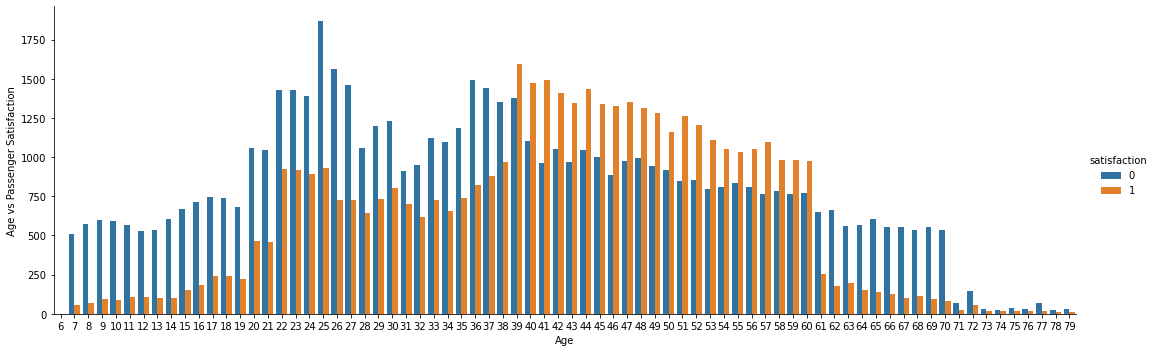

In [13]:
g = sns.catplot("Age", data=df, aspect=3.0, kind='count', hue='satisfaction', order=range(6, 80))
g.set_ylabels('Age vs Passenger Satisfaction')
plt.show()

- **There are division between the ages.**
-  **Ages 39-60 are more satisfied than neutral or dissatisfied.**
- **On the other hand, the other ages are more neutral or dissatisfied than satisfied.**

**Gender concerning to satisfaction**

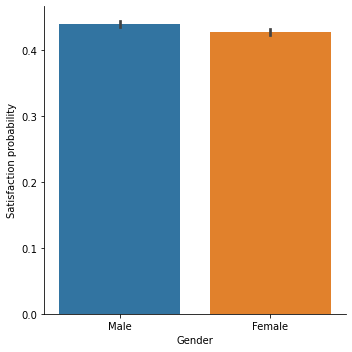

In [14]:
g = sns.catplot("Gender","satisfaction",data=df, kind='bar')
g.set_ylabels('Satisfaction probability')

- We can see that there is no significant difference between males and females  concerning to satisfaction

**Type of customer concerning to satisfaction**

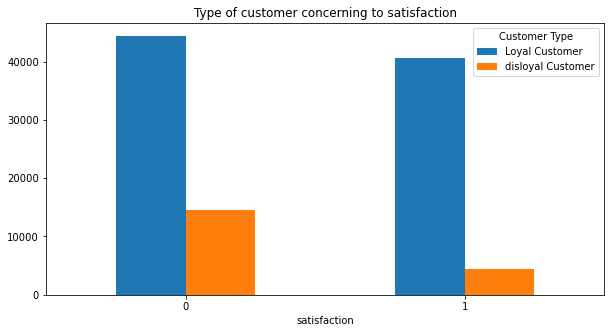

In [15]:
customer_df = df.groupby(['satisfaction', 'Customer Type'])['satisfaction'].count().unstack('Customer Type')
customer_df.plot(kind='bar',figsize = (10,5), rot=0, title='Type of customer concerning to satisfaction')

- About half of Loyal customers are satisfied.
- It is more than disloyal customers, that we can see clearly that most of them are not satisdied

**Type of class concerning to satisfaction**

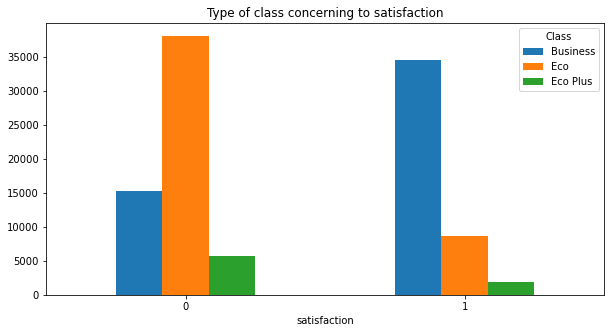

In [16]:
class_df = df.groupby(['satisfaction', 'Class'])['satisfaction'].count().unstack()
class_df.plot(kind='bar',figsize = (10,5), rot=0, title='Type of class concerning to satisfaction')

- There's a big influence to the class that you're in. 
- Most of the customers that have been in Business class and Eco plus class are satisfied from the flight.
- On the other hand, most of the customers that have been in Eco class are neutral or dissatisfied from the flight.
- So there's considerable impact of the class concerning to satisfaction

**Type of travel concerning to satisfaction**

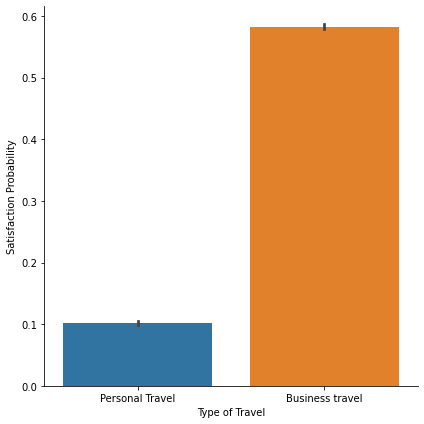

In [18]:
g=sns.catplot(x="Type of Travel",y="satisfaction",data=df,kind="bar",height=6)
g.set_ylabels("Satisfaction Probability")
plt.show()

- Most of the people travelling business travel are satisfied 
- But personal travel is %90 neutral or dissatisfied with the flight. This statistic is interesting.

**Flight distance concerning to satisfaction**

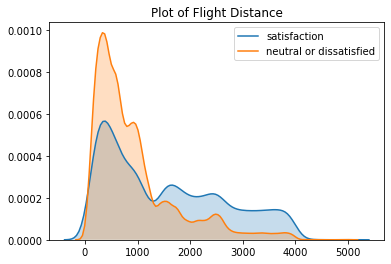

In [19]:
sns.kdeplot(df.loc[df["satisfaction"]==1]["Flight Distance"],label="satisfaction",shade=True)
sns.kdeplot(df.loc[df["satisfaction"]==0]["Flight Distance"],label="neutral or dissatisfied",shade=True)
plt.title("Plot of Flight Distance")
plt.show()

- As the flight distance is bigger, most of the people are satisfied.
- Most people are not satisfied as the distance is until 1000

### Change the objects to numeric values

In [20]:
df['Gender'].replace({'Male': 0, 'Female': 1},inplace = True)
df['Customer Type'].replace({'Loyal Customer': 0, 'disloyal Customer': 1},inplace = True)
df['Type of Travel'].replace({'Business travel': 0, 'Personal Travel': 1},inplace = True)
df['Class'].replace({'Business': 0, 'Eco': 1, 'Eco Plus':2},inplace = True)
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,0,13,1,2,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,0
1,0,1,25,0,0,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,0
2,1,0,26,0,0,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,1,0,25,0,0,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,0,0,61,0,0,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1


- To have better predictions about the satisfaction of the customer, we need to change our objects to numeric values.
- We have 4 objects: Gender, Customer Type, Type of Travel, Class.
- I replaced every one of them to numeric value: 
- 'Gender'-  'Male': 0, 'Female': 1.
- 'Customer Type'-  'Loyal Customer': 0, 'disloyal Customer': 1.
- 'Type of Travel'- 'Business travel': 0, 'Personal Travel': 1.
- 'Class'- 'Business': 0, 'Eco': 1, 'Eco Plus':2.

### Correlation matrix

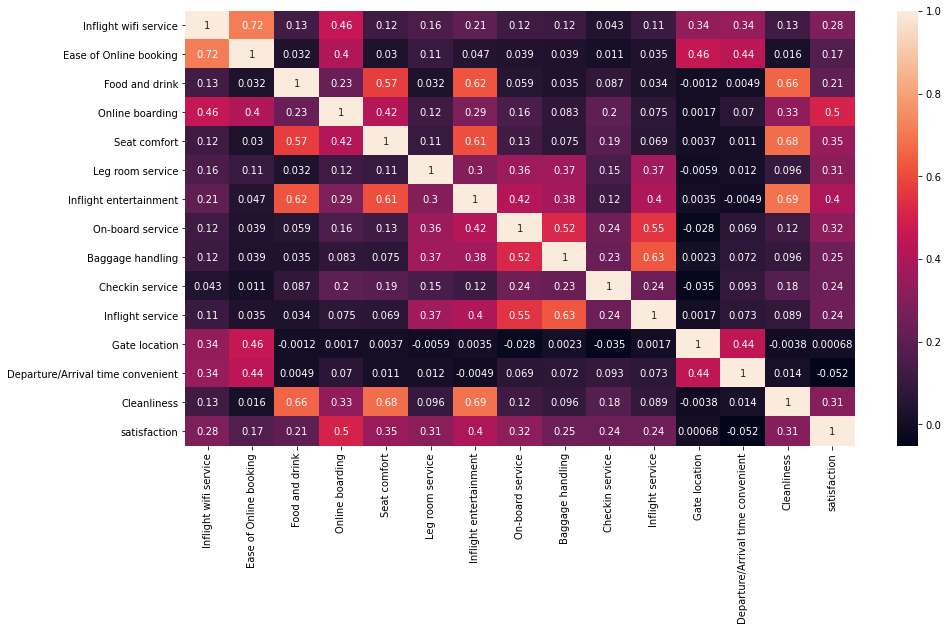

In [21]:
plt.figure(figsize=(15,8))
list1=['Inflight wifi service',
       'Ease of Online booking',
       'Food and drink', 'Online boarding', 'Seat comfort','Leg room service',
       'Inflight entertainment', 'On-board service', 
       'Baggage handling', 'Checkin service', 'Inflight service','Gate location',
       'Departure/Arrival time convenient',
       'Cleanliness',"satisfaction"]
sns.heatmap(df[list1].corr(),annot=True)
plt.show()

- We can observe some interesting things: 
- The feature cleanliness is correlate quite high with 'Food and drink'(0.66), 'Seat comfort'(0.68),  'Inflight entertainment'(0.69). The more people we're satisfied about the cleanliness, they we're more satisfied about those 3 features
- There is a high correlation betwwen 'Ease of Online booking' and 'Inflight wifi service'
- There is no direct correlation of any feature with our target variable 
- We will keep all of our features in for now, but can always return to this step in case we want to drop features.

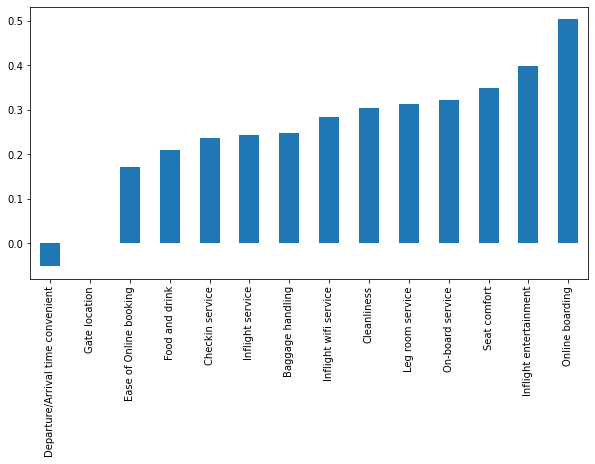

In [22]:
df[list1].corr()['satisfaction'].sort_values().drop('satisfaction').plot(kind='bar',figsize=(10,5))

- In this graph i present the correlation between our prediction(satisfaction) to the other relevant features.
- The highest correlation is 'online boarding'(50%), which means that as much as you were satisfied about the online boarding- there are high chances that you was satisdied.

## Modeling

- We will use 2 models:
    - KNeighbors Classifer
    - Logistic Regression
    

### Train - Test Split

In [23]:
from sklearn.model_selection import train_test_split
X =df.drop(labels=["satisfaction"],axis=1)
y =df["satisfaction"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


### K-neihghbours modeling

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("The accuracy is:")
print(round(metrics.accuracy_score(y_test, y_pred)*100,4),"%")

The accuracy is:
74.7173 %


- 74% is not good score for this task. We will try to get higher scores.

**First, we will scale our model and check**

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [26]:
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("The accuracy is:")
print(round(metrics.accuracy_score(y_test, y_pred)*100,4),"%")

The accuracy is:
92.9455 %


**We got to about 93% after scaling! now let's find the best k for the model** 

In [589]:
for n in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors = n)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    print('KNeighborsClassifier: n = {} , Accuracy is: {}'.format(n,knn.score(X_test,y_test)))

KNeighborsClassifier: n = 1 , Accuracy is: 0.9142967133439199
KNeighborsClassifier: n = 2 , Accuracy is: 0.9120831528800346
KNeighborsClassifier: n = 3 , Accuracy is: 0.9261344497377412
KNeighborsClassifier: n = 4 , Accuracy is: 0.9221885376064675
KNeighborsClassifier: n = 5 , Accuracy is: 0.9294547904335692
KNeighborsClassifier: n = 6 , Accuracy is: 0.9252201530243973
KNeighborsClassifier: n = 7 , Accuracy is: 0.9297435157114672
KNeighborsClassifier: n = 8 , Accuracy is: 0.9258938453394928
KNeighborsClassifier: n = 9 , Accuracy is: 0.9295991530725182
KNeighborsClassifier: n = 10 , Accuracy is: 0.9262306914970405
KNeighborsClassifier: n = 11 , Accuracy is: 0.9295029113132188
KNeighborsClassifier: n = 12 , Accuracy is: 0.9257013618208941
KNeighborsClassifier: n = 13 , Accuracy is: 0.9288292189981233
KNeighborsClassifier: n = 14 , Accuracy is: 0.9261825706173908
KNeighborsClassifier: n = 15 , Accuracy is: 0.9285404937202252
KNeighborsClassifier: n = 16 , Accuracy is: 0.92632693325634
KNe

**The best k is 7**

**We have high score,but we will try to get better. We drop the "Gate location", because it has 0 correlation with the target.We also drop the "Gender", because we saw that the influence about satisfaction is very neglectible. lets see the score now**

In [27]:
X =df.drop(labels=["satisfaction","Gate location","Gender"],axis=1)
y =df["satisfaction"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
print("The accuracy is:")
print(round(metrics.accuracy_score(y_test, y_pred)*100,4),"%")


The accuracy is:
93.3497 %


**Now the knn model has score of 93.35%**

### Cross-validation 

In [28]:
from sklearn.model_selection import cross_val_score
knn = KNeighborsClassifier(n_neighbors=7)
scores = cross_val_score(knn, X=X_train, y=y_train, cv=10, scoring='accuracy')
print("scores:")
print(scores)
print("The scores mean is:")
print(scores.mean())

scores:
[0.92890653 0.93167328 0.93227475 0.92841675 0.93443215 0.93491338
 0.93082291 0.93358999 0.93130414 0.93238691]
The scores mean is:
0.9318720782655783


-**The accuracy is also about 93% at cross validation, when we split our data 10 times. every time we check our model on another part of the data**

### Confusion matrix 

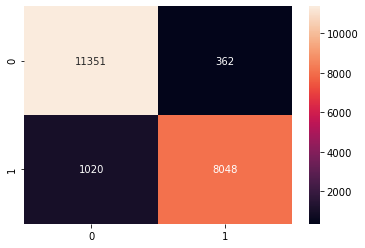

In [32]:
from sklearn.metrics import confusion_matrix
knn.fit(X_train, y_train)
y_pred=knn.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt="d") 
plt.show()

**TN**=11351, **FP**=362, **FN**=1020, **TP**=8048

**True positive (TP)** = the number of cases correctly identified as satisfied

**False positive (FP)** = the number of cases incorrectly identified as satisfied

**True negative (TN)** = the number of cases correctly identified as unsatisfied

**False negative (FN)** = the number of cases incorrectly identified as unsatisfied

In [30]:
from sklearn.metrics import plot_confusion_matrix, classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94     11713
           1       0.96      0.89      0.92      9068

    accuracy                           0.93     20781
   macro avg       0.94      0.93      0.93     20781
weighted avg       0.93      0.93      0.93     20781



 **accuracy**: How many the model correct from all cases.

 **Recall**: From all that was satisfied(TP+FN) (or not(TN+FP))- how many the model says that was satisfied(TP) (or not(TN)).

 **Precision**: From all that the model says was satisfied(TP+FP) (or not(TN+FN))- how many really was satisfied(TP) (or not(TN)).

 **f1-score**: parameter that gets the recall and the precision and combine them together.

## Logistic regression modeling 

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
LR = LogisticRegression(max_iter=10000)
LR.fit(X_train, y_train)
pred = LR.predict(X_test)
print("The accuracy is:")
print(round(metrics.accuracy_score(y_test, pred)*100,4),"%")

The accuracy is:
87.7869 %


**Let's see what happens if we drop only the target column**

In [34]:
X =df.drop(labels=["satisfaction"],axis=1)
y =df["satisfaction"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
LR = LogisticRegression(max_iter=10000000)
LR.fit(X_train, y_train)

pred = LR.predict(X_test)
print("The accuracy is:")
print(round(metrics.accuracy_score(y_test, pred)*100,4),"%")

The accuracy is:
87.811 %


- The model has better score now

### Cross-validation (Logistic regression)

In [35]:
lr = LogisticRegression(max_iter=10000)
scores = cross_val_score(lr, X, y, cv=10, scoring='accuracy')
print("The scores mean is:")
print(round(scores.mean()*100,4),"%")

The scores mean is:
87.5385 %


- **The accuracy is also about 88% at cross validation, when we split our data 10 times. every time we check our model on another part of the data**

### Confusion matrix 

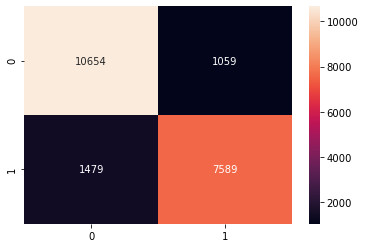

In [631]:
y_pred=LR.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt="d") 
plt.show()

**TN**=10654, **FP**=1059, **FN**=7589, **TP**=1479

In [633]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89     11713
           1       0.88      0.84      0.86      9068

    accuracy                           0.88     20781
   macro avg       0.88      0.87      0.88     20781
weighted avg       0.88      0.88      0.88     20781



# Part b - semester b

* In the project of the first semester the best accuracy was 93% using knn model. I cleaned the data, scaled it, then dropped 
 another featurs with low correlation to the targed and got 93%. Now i will try to improve the accuracy again.

### Using ensemble methods to improve the accuracy:


* Random forest
* Voting
* Adaboost
* XGboost
* Stacking

In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [100]:
#Create function that shows the accuracy for the chosen model
def result(model):
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    print(round(metrics.accuracy_score(y_test,y_predict)*100,4),"%")

**Random Forest**

In [101]:
rfc=RandomForestClassifier()
result(rfc)

96.2466 %


**Bagging with DecisionTree**

In [102]:
bag = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500,max_samples=100, bootstrap=True, n_jobs=-1 )
result(bag)

91.4345 %


**AdaBoost**

In [112]:
ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=200,algorithm="SAMME.R", learning_rate=0.5)
result(ada)

92.8974 %


**xgBoost**

In [97]:
xgb=XGBClassifier(use_label_encoder=False, learning_rate=0.2)
result(xgb)

[18:39:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
The accuracy is:
96.2081 %


C:\Users\97254\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


**Voting**

In [116]:
voting = VotingClassifier(estimators=[('knn', knn), ('rfc', rfc), ('xgb', xgb)],voting='hard')
result(voting)

[18:57:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
96.2466 %


C:\Users\97254\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


## Summary 

In [113]:
data = {'knn':  ['93.35%'],
        'Logistic Regression': ['87.53%'],
        'Random Forest': ['96.24%'],
        'voting': ['96.19%'],
        'Bagging with DecisionTree': ['91.43%'],
        'AdaBoost':['92.89%'],
        'xgboost':['96.19%']
        }
df = pd.DataFrame (data, columns = ['knn','Logistic Regression','Random Forest','Bagging with DecisionTree','AdaBoost','xgboost','voting']
                   ,index=['accuracy'])
df

,knn,Logistic Regression,Random Forest,Bagging with DecisionTree,AdaBoost,xgboost,voting
accuracy,93.35%,87.53%,96.24%,91.43%,92.89%,96.19%,96.19%


* The best ensemble model is **Random Forest model** with accuracy of **96.24%**
* That is about **3%** higher than knn model that i reached in the last project
* The **Voting model and xgboost model** also got high scores of **96.19%**